In [19]:


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data_path = "/content/drive/MyDrive/ML/fer2013.csv"
data = pd.read_csv(data_path)



In [21]:

X = np.array([np.fromstring(image, dtype=int, sep=' ') for image in data['pixels']])


In [22]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [23]:
pca = PCA().fit(X)


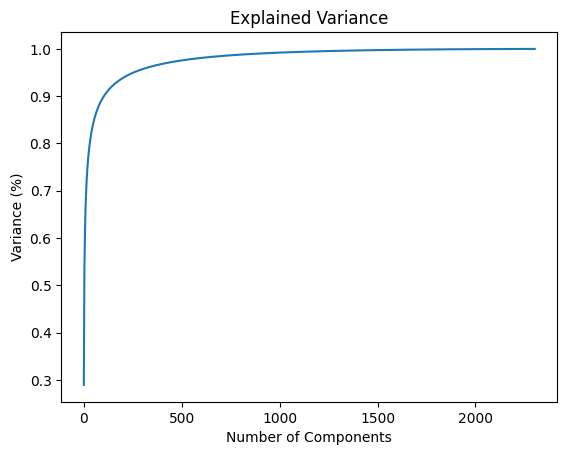

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()


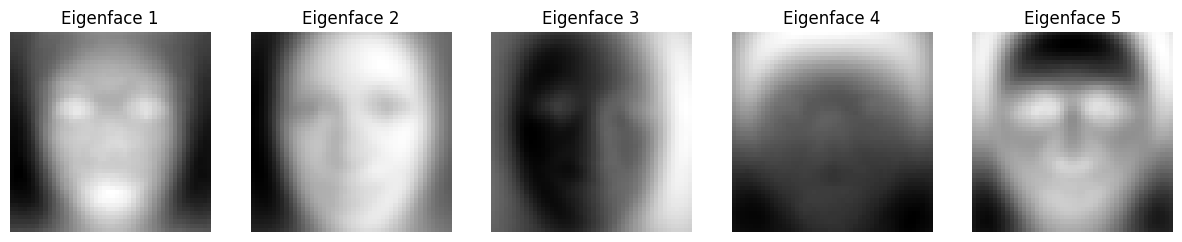

In [25]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


train_data = data[data['Usage'] == 'Training']

pixel_data = train_data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))
pixel_data = np.stack(pixel_data, axis=0)


n_components = 5
pca = PCA(n_components=n_components)
pca.fit(pixel_data)


eigenvalues = pca.explained_variance_[:5]
eigenfaces = pca.components_[:5]


fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, (ax, eigenface) in enumerate(zip(axes.flatten(), eigenfaces)):
    ax.imshow(eigenface.reshape(48, 48), cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


train_data = data[data['Usage'] == 'Training']

pixel_data = train_data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))
pixel_data = np.stack(pixel_data, axis=0)


n_components = 5
pca = PCA(n_components=n_components)
pca.fit(pixel_data)


eigenvalues = pca.explained_variance_[:5]
eigenfaces = pca.components_[:5]


fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, (ax, eigenface) in enumerate(zip(axes.flatten(), eigenfaces)):
    ax.imshow(eigenface.reshape(48, 48), cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')
plt.show()


Results for k=1:
CCR with PCA: 0.4165505711897464
Confusion Matrix with PCA:
[[310  17 108 184 114  50 175]
 [  6  68   3   8   7   3  16]
 [ 98   8 396 144 135  85 158]
 [153  21 151 772 194  90 393]
 [134  29 141 239 396  45 263]
 [ 48   7  70  74  38 522  72]
 [101   9 139 222 175  61 526]]
CCR without PCA: 0.40916689885762053
Confusion Matrix without PCA:
[[299  20 108 177 118  41 195]
 [  8  66   3   9   9   4  12]
 [100   7 395 142 136  76 168]
 [152  25 166 736 191  78 426]
 [138  27 138 223 390  46 285]
 [ 43  10  62  74  40 512  90]
 [ 97  11 133 212 186  55 539]]




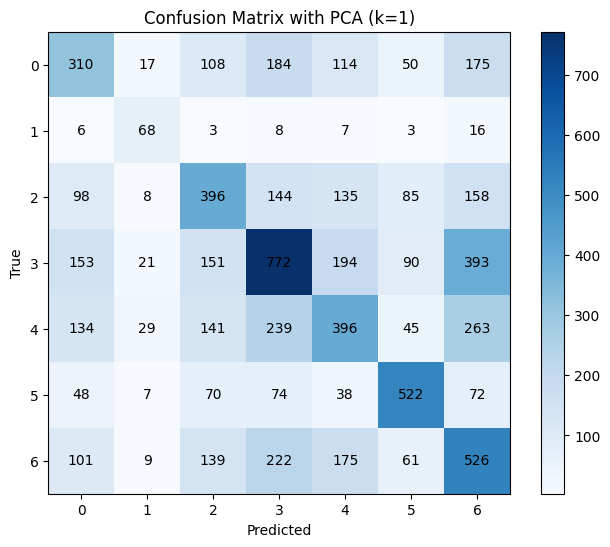

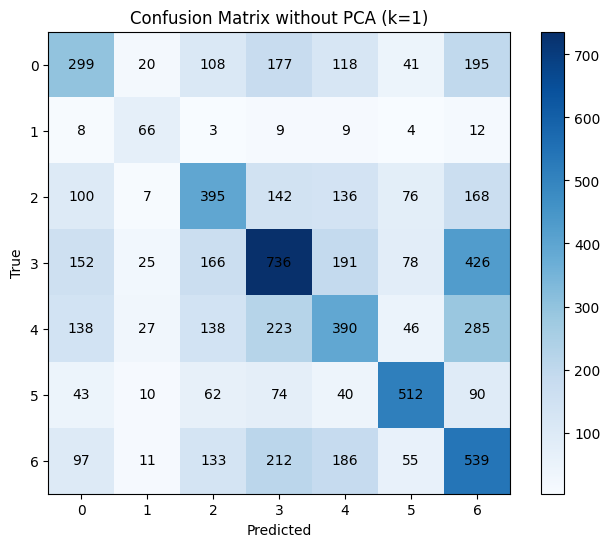





Results for k=2:
CCR with PCA: 0.3624965171356924
Confusion Matrix with PCA:
[[367  27 168 208  86  27  75]
 [ 19  65   4   9   4   2   8]
 [183  19 447 176  99  52  48]
 [292  45 250 849 156  55 127]
 [248  42 233 330 266  28 100]
 [ 91  13 132 141  63 370  21]
 [196  28 219 330 165  57 238]]
CCR without PCA: 0.3616606297018668
Confusion Matrix without PCA:
[[359  29 152 209  98  27  84]
 [ 18  64   5   9   5   2   8]
 [180  20 436 180 102  54  52]
 [287  39 252 836 161  62 137]
 [239  49 215 328 282  32 102]
 [ 87  13 125 136  72 374  24]
 [194  26 222 319 179  48 245]]




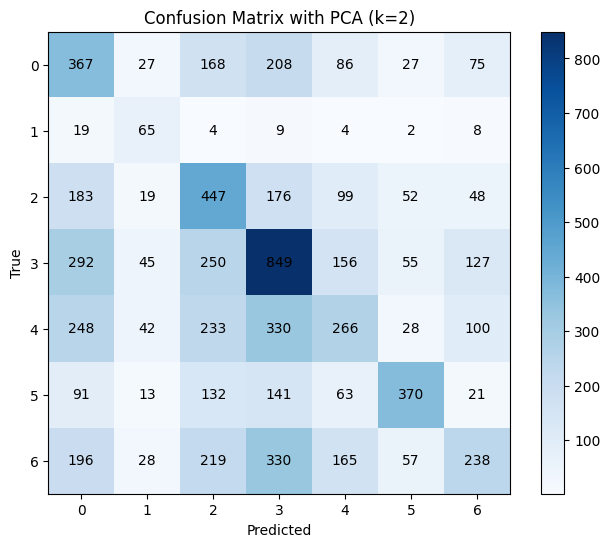

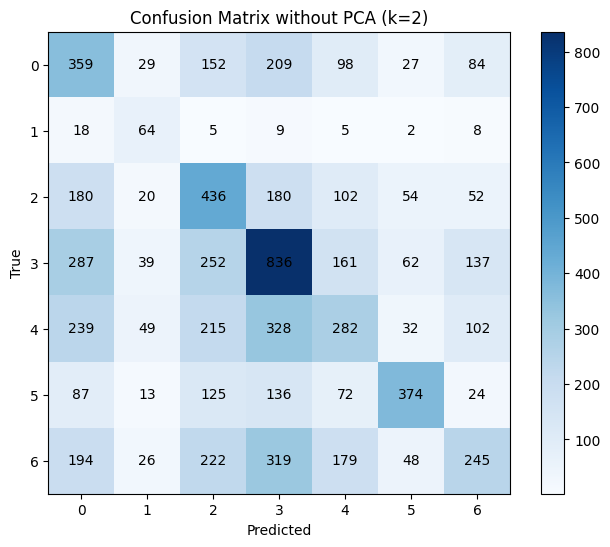

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


train_data = data[data['Usage'] == 'Training']
test_data = data[(data['Usage'] == 'PublicTest') | (data['Usage'] == 'PrivateTest')]


X_train = np.stack(train_data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32')).values)
y_train = train_data['emotion'].values

X_test = np.stack(test_data['pixels'].apply(lambda x: np.array(x.split(), dtype='float32')).values)
y_test = test_data['emotion'].values

# Normalized
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# KNN  k=1 k=2
k_values = [1, 2]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    #Matrix with PCA
    knn.fit(X_train_pca, y_train)
    y_pred_pca = knn.predict(X_test_pca)
    ccr_pca = accuracy_score(y_test, y_pred_pca)
    confusion_matrix_pca = confusion_matrix(y_test, y_pred_pca)

    # Matrixwithout PCA
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    ccr = accuracy_score(y_test, y_pred)
    confusion_matrix_no_pca = confusion_matrix(y_test, y_pred)


    results[k] = {
        'ccr_pca': ccr_pca,
        'confusion_matrix_pca': confusion_matrix_pca,
        'ccr_no_pca': ccr,
        'confusion_matrix_no_pca': confusion_matrix_no_pca
    }


for k, result in results.items():
    print(f"Results for k={k}:")
    print(f"CCR with PCA: {result['ccr_pca']}")
    print(f"Confusion Matrix with PCA:\n{result['confusion_matrix_pca']}")
    print(f"CCR without PCA: {result['ccr_no_pca']}")
    print(f"Confusion Matrix without PCA:\n{result['confusion_matrix_no_pca']}")
    print("\n")

    # Plot the confusion matrix for PCA with numbers
    plt.figure(figsize=(8, 6))
    plt.imshow(result['confusion_matrix_pca'], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix with PCA (k={k})")
    plt.colorbar()
    classes = np.arange(len(result['confusion_matrix_pca']))
    plt.xticks(classes, classes)
    plt.yticks(classes, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Display numbers within each cell
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, result['confusion_matrix_pca'][i, j], ha='center', va='center', color='black')

    plt.show()

    # Plot the confusion matrix without PCA with numbers
    plt.figure(figsize=(8, 6))
    plt.imshow(result['confusion_matrix_no_pca'], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix without PCA (k={k})")
    plt.colorbar()
    classes = np.arange(len(result['confusion_matrix_no_pca']))
    plt.xticks(classes, classes)
    plt.yticks(classes, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Display numbers within each cell
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, result['confusion_matrix_no_pca'][i, j], ha='center', va='center', color='black')

    plt.show()

    print("\n")

    print("\n")

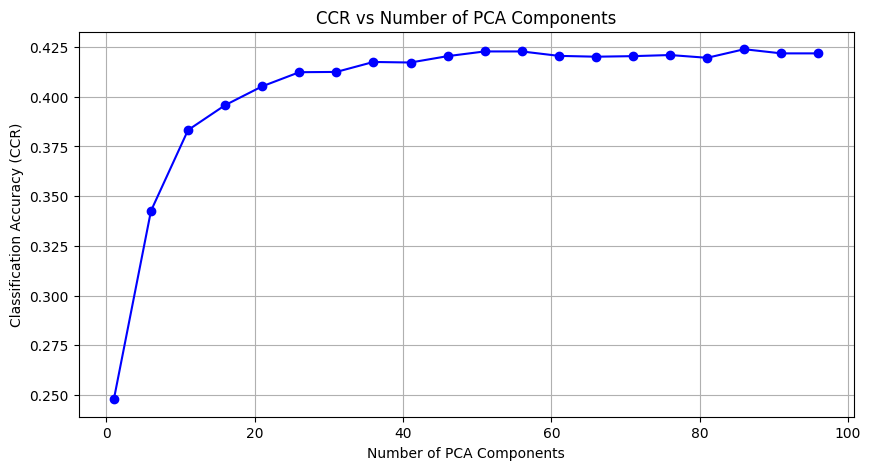

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


components = np.arange(1, 101, 5)


ccr_scores = []

for n in components:
    # PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # K-NN
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca, y_train)


    y_pred = knn.predict(X_test_pca)
    ccr = accuracy_score(y_test, y_pred)
    ccr_scores.append(ccr)


plt.figure(figsize=(10, 5))
plt.plot(components, ccr_scores, marker='o', linestyle='-', color='blue')
plt.title('CCR vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy (CCR)')
plt.grid(True)
plt.show()
